Hands-on Activity 4.1: Advanced Data Analytics and Machine Learning<br>


Name: Mark Joseph C. Vista<br>
Section: CPE-019 - CPE32S9<br>
Instructor: Engr. Roman Richard

Use the titanic dataset, which you can download here: titanic_test.csv titanic_test.csv<br>

PART 1: Do the following objectives:<br>

Part 1: Import the Libraries and Data<br>

Part 2: Plot the Data<br>

Part 3: Perform Simple Linear Regression on the SURVIVAL feature column<br>
(you can check the internet on how you can perform simple linear regression)<br>

PART 2: Download this PDF and perform the DECISION TREE classification activity<br>

- Titanic dataset - titanic_train.csv

- Part 1: Import the Libraries and Data

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
TitanicFrame = pd.read_csv('/content/titanic_train.csv')


Part 2: Plot the Data

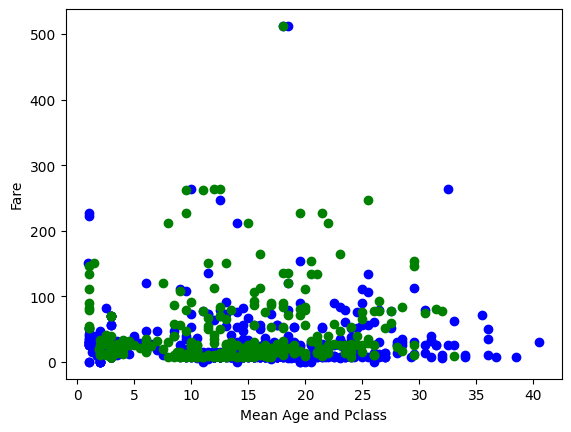

In [125]:
MEN = TitanicFrame[(TitanicFrame.Sex == 'male')]
WOMEN = TitanicFrame[(TitanicFrame.Sex == 'female')]


Male_Mean = MEN[["Age", "Pclass"]].mean(axis=1)
Female_Mean = WOMEN[["Age", "Pclass"]].mean(axis=1)

plt.scatter(Male_Mean, MEN["Fare"], color='blue')
plt.scatter(Female_Mean, WOMEN["Fare"], color='green')

plt.xlabel('Mean Age and Pclass')
plt.ylabel('Fare')
plt.show()

Part 3: Perform Simple Linear Regression on the SURVIVAL feature column (you can check the internet on how you can perform simple linear regression)

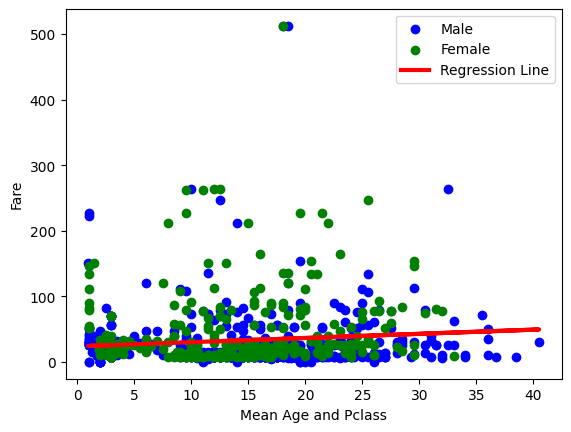

In [127]:
from sklearn.linear_model import LinearRegression

X = pd.concat([Male_Mean, Female_Mean], axis=0)
y = pd.concat([MEN["Fare"], WOMEN["Fare"]], axis=0)

X = X.values.reshape(-1, 1)

regression_model = LinearRegression()
regression_model.fit(X, y)

y_pred = regression_model.predict(X)

plt.scatter(Male_Mean, MEN["Fare"], color='blue', label='Male')
plt.scatter(Female_Mean, WOMEN["Fare"], color='green', label='Female')
plt.plot(X, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Mean Age and Pclass')
plt.ylabel('Fare')
plt.legend()
plt.show()

---------------------------------------------------------------------------<br>
- Titanic dataset - titanic_test.csv

- Part 1: Import the Libraries and Data

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
TestFrame = pd.read_csv('/content/titanic_test.csv')

- Part 2: Plot the Data

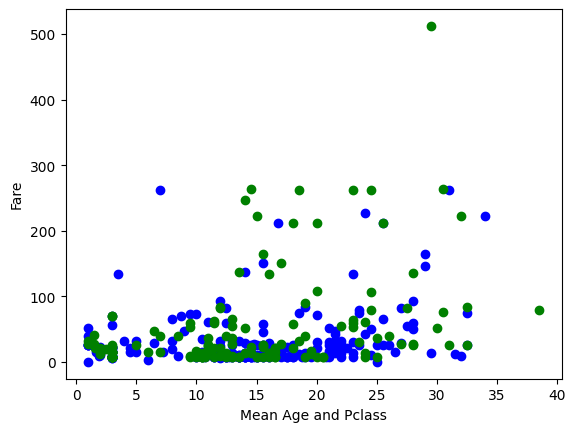

In [129]:
MEN = TestFrame[(TestFrame.Sex == 'male')]
WOMEN = TestFrame[(TestFrame.Sex == 'female')]


Male_Mean = MEN[["Age", "Pclass"]].mean(axis=1)
Female_Mean = WOMEN[["Age", "Pclass"]].mean(axis=1)

plt.scatter(Male_Mean, MEN["Fare"], color='blue')
plt.scatter(Female_Mean, WOMEN["Fare"], color='green')

plt.xlabel('Mean Age and Pclass')
plt.ylabel('Fare')
plt.show()

- Part 3: Perform Simple Linear Regression on the SURVIVAL feature column (you can check the internet on how you can perform simple linear regression)

<ipython-input-132-bbb434124937>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MEN["Fare"].fillna(MEN["Fare"].median(), inplace=True)
<ipython-input-132-bbb434124937>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WOMEN["Fare"].fillna(WOMEN["Fare"].median(), inplace=True)


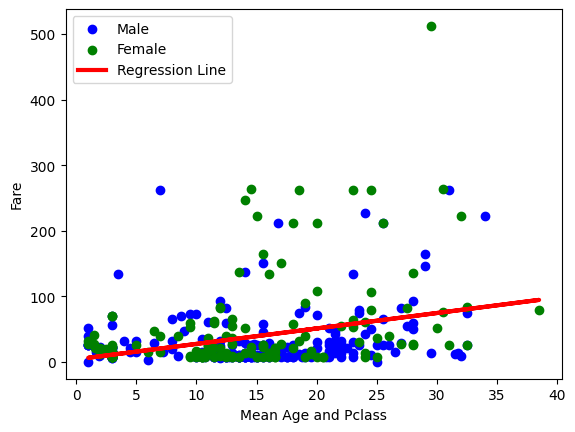

In [132]:
from sklearn.linear_model import LinearRegression

TestFrame = pd.read_csv('/content/titanic_test.csv')

MEN = TestFrame[TestFrame['Sex'] == 'male']
WOMEN = TestFrame[TestFrame['Sex'] == 'female']

Male_Mean = MEN[["Age", "Pclass"]].mean(axis=1)
Female_Mean = WOMEN[["Age", "Pclass"]].mean(axis=1)

MEN["Fare"].fillna(MEN["Fare"].median(), inplace=True)
WOMEN["Fare"].fillna(WOMEN["Fare"].median(), inplace=True)

X = pd.concat([Male_Mean, Female_Mean], axis=0).values.reshape(-1, 1)
y = pd.concat([MEN["Fare"], WOMEN["Fare"]], axis=0)

regression_model = LinearRegression()
regression_model.fit(X, y)

y_pred = regression_model.predict(X)

plt.scatter(Male_Mean, MEN["Fare"], color='blue', label='Male')
plt.scatter(Female_Mean, WOMEN["Fare"], color='green', label='Female')
plt.plot(X, y_pred, color='red', linewidth=3, label='Regression Line')
plt.xlabel('Mean Age and Pclass')
plt.ylabel('Fare')
plt.legend()
plt.show()


---------------------------------------------------

- PART 2: Decision Tree Classification

 <br>Part 1: Create a Decision Tree Classifier

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
TitanicFrame = pd.read_csv('/content/titanic_train.csv')

TitanicFrame[:15]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


 With the data above, what kinds of questions can we ask about the factors that contributed to passengers
 surviving or perishing in the Titanic disaster?<br>

-  Step 1: Create the dataframe<br>
a) Import pandas and the csv file

In [88]:
 #Code cell 1
#import pandas
import pandas as pd
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("/content/titanic_train.csv")

b) Verify the import and take a look at the data.

In [89]:
 #Code cell 2
#verify the contents of the training dataframe using the pandas info() method.
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Are there missing values in the data set?**
- Yes , it has missing value in the data set

In [90]:
#Code cell 3
#view the first few rows of the data
training[:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


- Step 2: Prepare the Data for the Decision Tree Model<br>
a) Replace string data with numeric labels

In [91]:
#code cell 4
training["Sex"] = training["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

b) Verify that the Gender variable has been changed.

In [92]:
 #code cell 5
#view the first few rows of the data again
training[:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S


 c) Address Missing Values in the Dataset

In [93]:
 #code cell 6
training["Age"].fillna(training["Age"].mean(), inplace=True)

d) Verify that the values have been replaced.

In [94]:
 #code cell 7
#verify that the missing values for the age variable have been eliminated.
training[:7]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,E46,S


**What is the value that was used to replace the missing ages?**


In [ ]:
fillna()

**- Step 3: Train and Score the Decision Tree Model.<br>**
 a) Create an array object with the variable that will be the target for the model.

In [95]:
#code cell 8
#create the array for the target values
y_target = training["Survived"].values

b) Create an array of the values that will be the input for the model.

In [96]:
#code cell 9
columns = ["Fare", "Pclass", "Sex", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

c) Create the learned model.

In [97]:
 #code cell 10
#import the tree module from the sklearn library
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object.
#Supply the method with the input variable X_input and the target variable y_target
clf_train = clf_train.fit(X_input, y_target)

d) Evaluate the model

In [98]:
#code cell 11
clf_train.score(X_input,y_target)

0.8226711560044894

-  Step 6: Visualize the Tree<br>
 a) Create the intermediate file output

In [99]:
#cell 12

from io import StringIO
from sklearn.tree import export_graphviz


with open("/content/drive/MyDrive/Data/titanic.dot", 'w') as f:
    f = export_graphviz(clf_train, out_file=f, feature_names=columns)


b) Install Graphviz

In [27]:
!apt install libarchive-dev
!pip install pydot
!pip install graphviz
import pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  libarchive-dev
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 581 kB of archives.
After this operation, 2,195 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1 [581 kB]
Fetched 581 kB in 0s (2,261 kB/s)
Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 121749 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...


 c) Convert the intermediate file to a graphic

In [100]:
#code cell 13
#run the Graphviz dot command to convert the .dot file to .png
!dot -Tpng /content/drive/MyDrive/Data/titanic.dot -o /content/drive/MyDrive/Data/titanic.png

d) Display the image

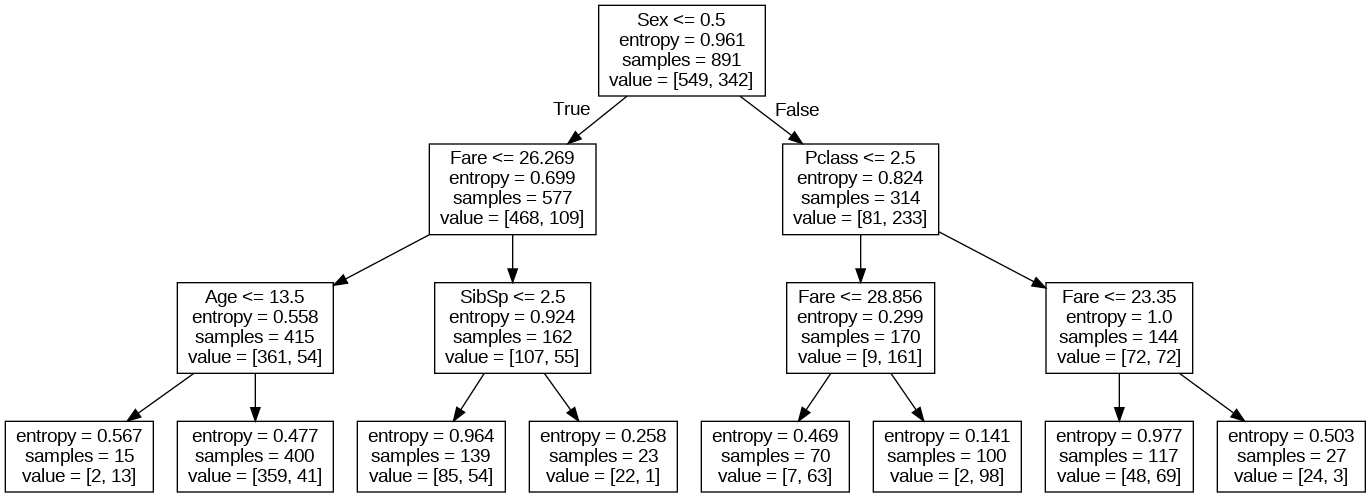

In [101]:
#code cell 14
#import the Image module from the Ipython.display libary
from IPython.display import Image
#display the decison tree graphic
Image("/content/drive/MyDrive/Data/titanic.png")

 e) Interpret the tree

 **What describes the group that had the most deaths by number? Which group had the most survivors?**
 - Male are sex with more deaths
 - female are sex with more survivors

-  Part 2: Apply the Decision Tree Model

- Step 1: Import and Prepare the Data<br>
a) Import the data.

In [102]:
#code cell 15
#import the file into the 'testing' dataframe./con
testing = pd.read_csv("/content/titanic_test.csv")
testing.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**How many records are in the data set?<br>**
- 418 entries


 **Which important variables(s) are missing values and how many are missing?**<br>
 -In Age 86 are missing
In Fare 1 is missing

In [103]:
missing_values = testing.isnull().sum()

print("Missing values for each variable:")
print(missing_values)

Missing values for each variable:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


b) Use a lambda expression to replace the "male" and "female" values with 0 for male and 1 for
 female..

In [104]:
 #code cell 16
#replace the Gender labels in the testing dataframe
# Hint: look at code cell 4

testing["Sex"] = testing["Sex"].apply(lambda toLabel: 0 if toLabel =='male' else 1)

c) Replace the missing age values with the mean of the ages.

In [105]:
 #code cell 17
#Use the fillna method of the testing dataframe column "Age"
#to replace missing values with the mean of the age values.

testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [106]:
testing["Fare"].fillna(testing["Fare"].mean(), inplace=True)

d) Verify that the values have been replaced.

In [107]:
#code cell 18
#verify the data preparation steps. Enter and run both the info and head
#methods from here, by entering and running one and then the other.

testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [108]:
testing.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,NaN,S


- Step 2: Label the testing dataset<br>
 a) Create the array of input variables from the testing data set.

In [109]:
#code cell 19
#create the variable X_input to hold the features that the classifier will use

X_input = testing[list(columns)].values

b) Apply the model to the testing data set.

In [133]:
#cell 20
target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival': target_labels, 'Name': testing['Name']})
testing.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,NaN,Q


c) Evaluate the accuracy of the estimated labels

In [115]:
 #code cell 21
#import the numpy library as np
import numpy as np

# Load data for all passengers in the variable all_data
all_data = pd.read_csv("/content/titanic_all.csv")

# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))

# Print the result
print("Accuracy:", acc)

Accuracy: 0.7682619647355163


-  Part 3: Evaluate the Decision Tree Model

- Step 1: Import the data<br>


In [116]:
#code cell 22

#import the titanic_all.csv file into a dataframe called all_data. Specify the list of columns to import.
all_data = pd.read_csv("/content/titanic_all.csv", usecols=['Survived','Pclass','Sex','Age','SibSp','Fare'])

#View info for the new dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Sex       1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


**How many records are in the data set?**
- 1308 entries

 **Which important variables(s) are missing values and how many are missing?**
 - In Age	263 are missing


In [117]:
import pandas as pd

missing_values = all_data.isnull().sum()

print("Missing values for each variable:")
print(missing_values)

Missing values for each variable:
Survived      0
Pclass        0
Sex           0
Age         263
SibSp         0
Fare          0
dtype: int64


- Step 2: Prepare the data.<br>
 a) Remove the "male" and "female" strings and replace them with 0 and 1 respectively.

In [118]:
 #code cell 23
#Label the gender variable with 0 and 1
all_data["Sex"] = all_data["Sex"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

 c) Replace the missing age values with the mean of the age of all members of the data set.

In [119]:
 #code cell 24
#replace missing Age values with the mean age
#display the first few rows of the data set
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)
all_data.head(8)

,Survived,Pclass,Sex,Age,SibSp,Fare
0,1,1,1,29.0000,0,211.3375
1,1,1,0,0.9167,1,151.5500
2,0,1,1,2.0000,1,151.5500
3,0,1,0,30.0000,1,151.5500
4,0,1,1,25.0000,1,151.5500
5,1,1,0,48.0000,0,26.5500
6,1,1,1,63.0000,1,77.9583
7,0,1,0,39.0000,0,0.0000


- Step 2: Create the input and output variables for the training and testing data.<br>
a) Designate the input variables and output variables and generate the arrays.

In [120]:
 #code cell 25
#Import train_test_split() from the sklearn.model_selection libary
from sklearn.model_selection import train_test_split

#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.40, random_state=0)

b) Train the model and fit it to the testing data.

In [121]:
#code cell 26
#create the training decision tree object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

c) Compare models by scoring each.

In [122]:
 #code cell 27
#score the model on the two datasets and store the scores in variables. Convert the scores to strings using str()
train_score = str(clf_train.score(X_train,y_train))
test_score = str(clf_train.score(X_test,y_test))

#output the values in a test string
print('Training score = '+ train_score+' Testing score = '+test_score)

Training score = 0.8201530612244898 Testing score = 0.8053435114503816


**Conclusion**
- It's been a challenge since I've been working on linear regression of datasets. I've also been debugged several times.
We imported python libraries like pandas and matplotlib to import the titanic dataset using pd.read_csv. I have combined the male and female data in one plot. I separate the plotting of data for the titanic_train and titanic_test.
I took the of mean age and pclass of male and female and I used the scatter plot in the data for better visualization.